# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [47]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [49]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [56]:
df["am"] = df["am"].astype(str)

# Convert the other variables below

df["vs"] = df["vs"].astype(str)
df["cyl"] = df["cyl"].astype(str)
df["gear"] = df["gear"].astype(str)
df["carb"] = df["carb"].astype(str)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It's not quite clear immediately, but you can tell by using the type() method in python. For example, the below code checks the type of the first value in the "am" column, which returns str indicating it has been converted to text.

In [51]:
type(df["am"][0])

str

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

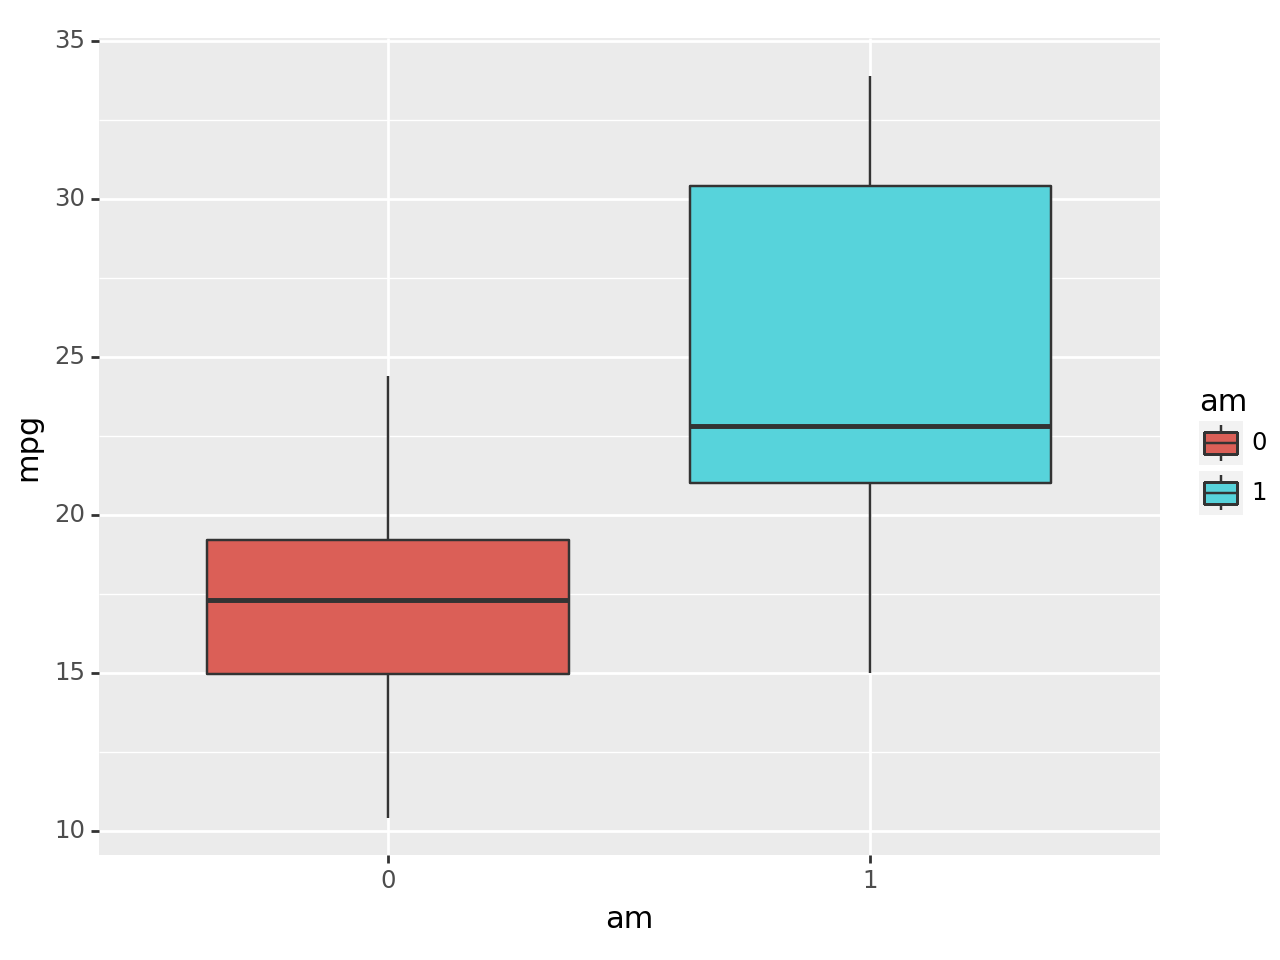

<Figure Size: (640 x 480)>

In [52]:
# Create plot for (1) here
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot
ggplot(df, aes(x = "am", y = "mpg",fill="am")) + geom_boxplot()


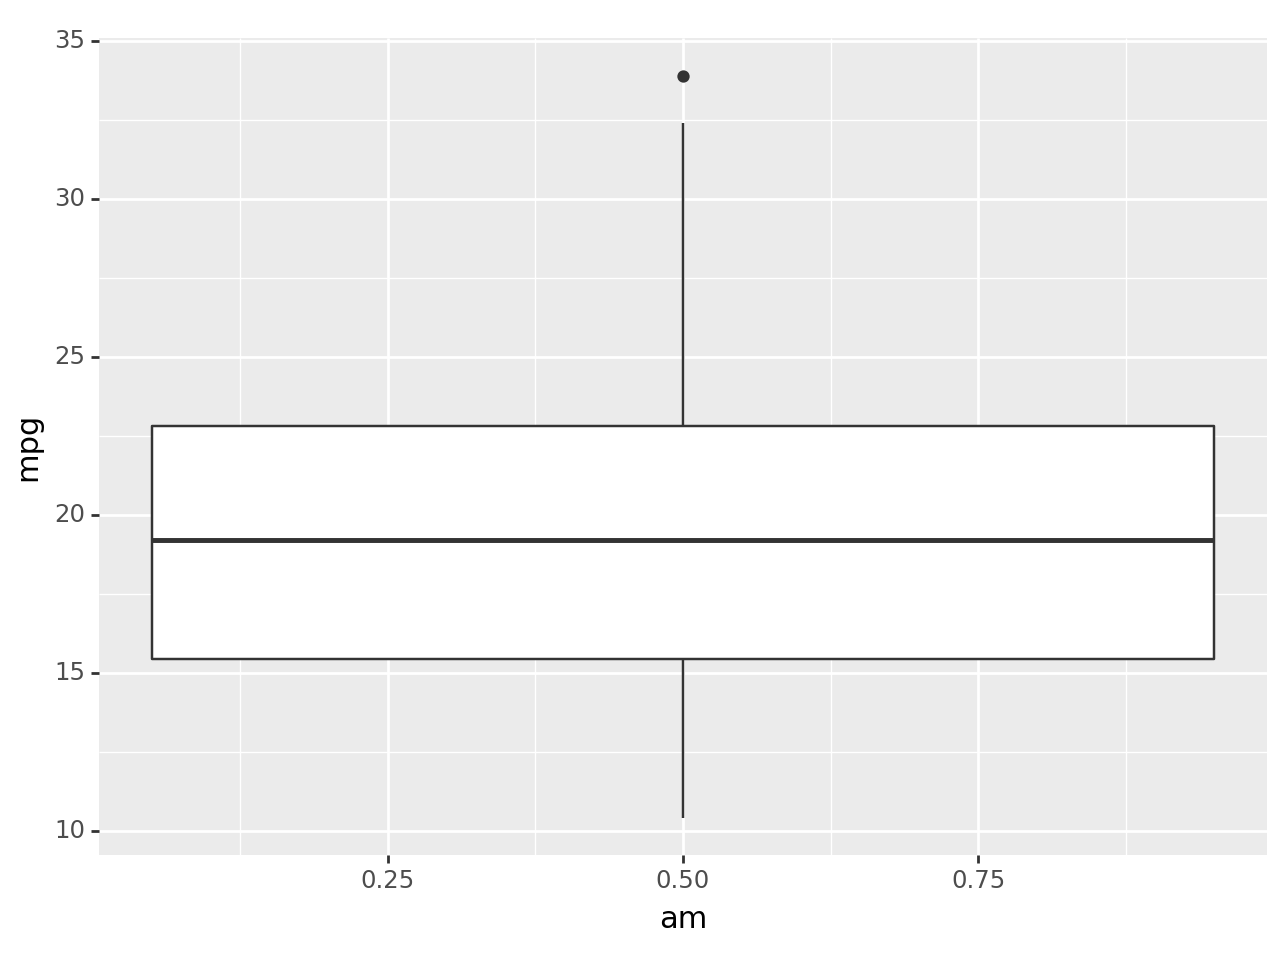

<Figure Size: (640 x 480)>

In [53]:
df["am"] = df["am"].astype(int)
ggplot(df, aes(x = "am", y = "mpg",fill="am")) + geom_boxplot()

Trying to do the same with the categorical variable am as integers tries to force the am axis as continuous I think, which creates only 1 box plot instead.

In [29]:
#Checking the unique values in the cyl list for plotting down later
test = []
for val in df["cyl"]:
  if val not in test:
    test.append(val)
test

[6, 4, 8]

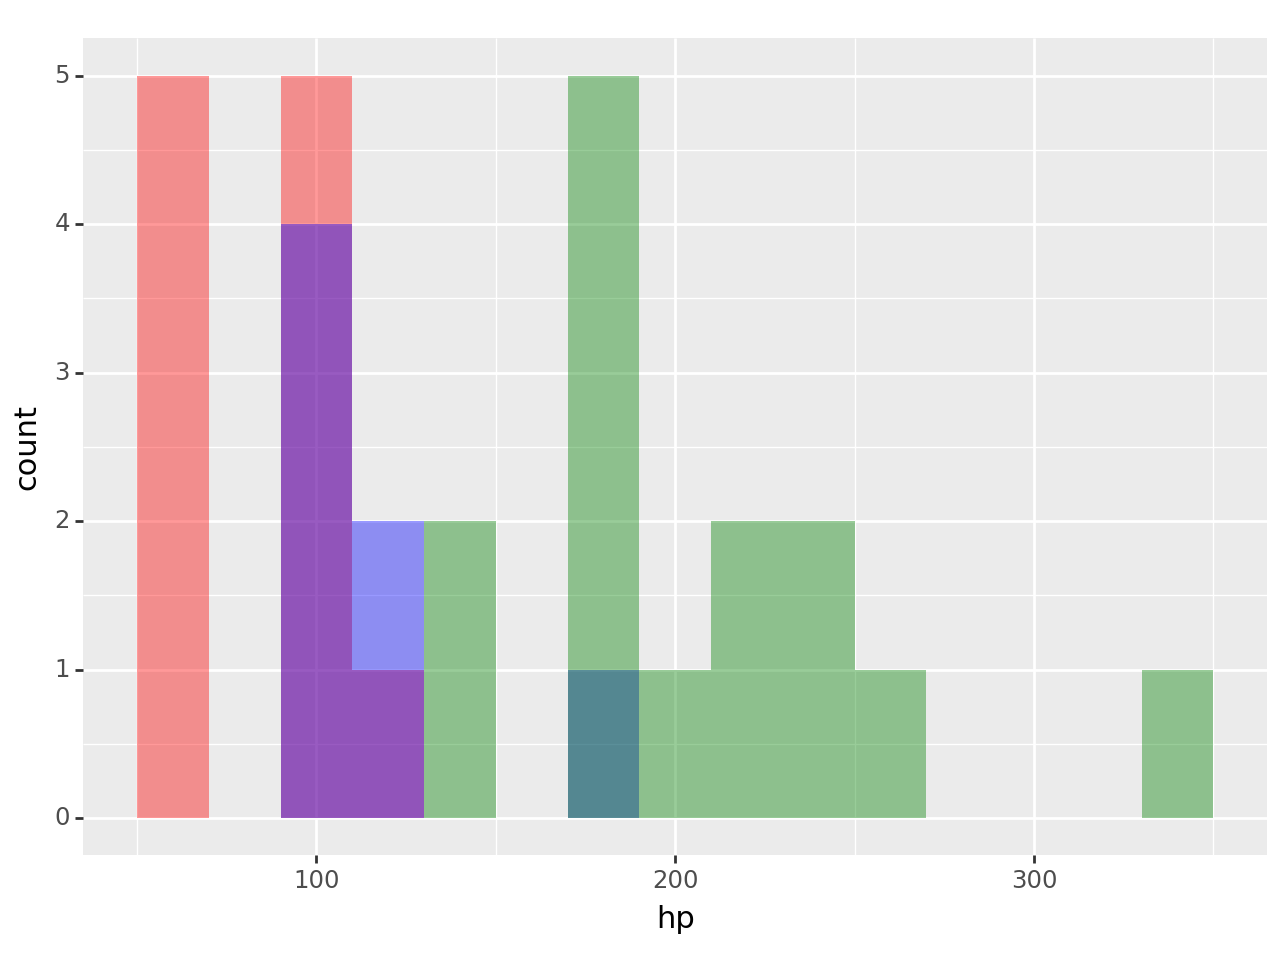

<Figure Size: (640 x 480)>

In [57]:
# Create plot for (2) here
import pandas as pd
from plotnine import ggplot, geom_histogram, aes, geom_boxplot
binw = 20
ggplot(df,aes(x = "hp")) + geom_histogram(data=df[df["cyl"] == "4"],binwidth=binw,alpha = 0.4,fill="red") + geom_histogram(data=df[df["cyl"] == "6"],binwidth=binw,alpha = 0.4,fill="blue") + geom_histogram(data=df[df["cyl"] == "8"],binwidth=binw,alpha = 0.4,fill="green")

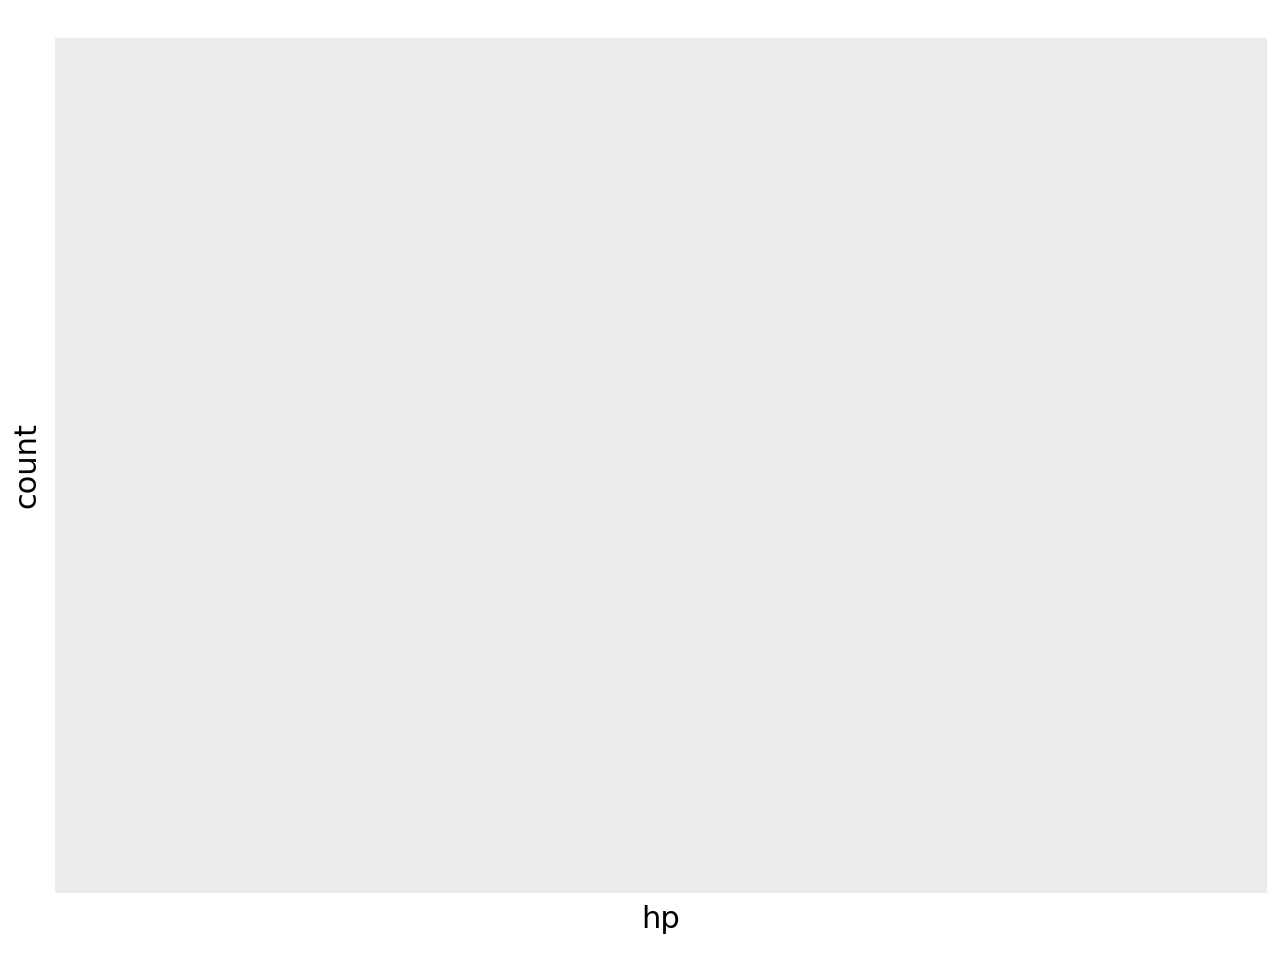

<Figure Size: (640 x 480)>

In [58]:
# Create plot for (2) here
df["cyl"] = df["cyl"].astype(int)
binw = 20
ggplot(df,aes(x = "hp")) + geom_histogram(data=df[df["cyl"] == "4"],binwidth=binw,alpha = 0.4,fill="red") + geom_histogram(data=df[df["cyl"] == "6"],binwidth=binw,alpha = 0.4,fill="blue") + geom_histogram(data=df[df["cyl"] == "8"],binwidth=binw,alpha = 0.4,fill="green")

Changing cyl back to integers creates a problem in the previous code that the filter of the dataframe doesn't pick up on the values anymore as strings and therefore catches no data and graphs nothing. We could change the filter to check for integer values instead of the string of digits and get the same result again though.

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

<Axes: xlabel='drat', ylabel='qsec'>

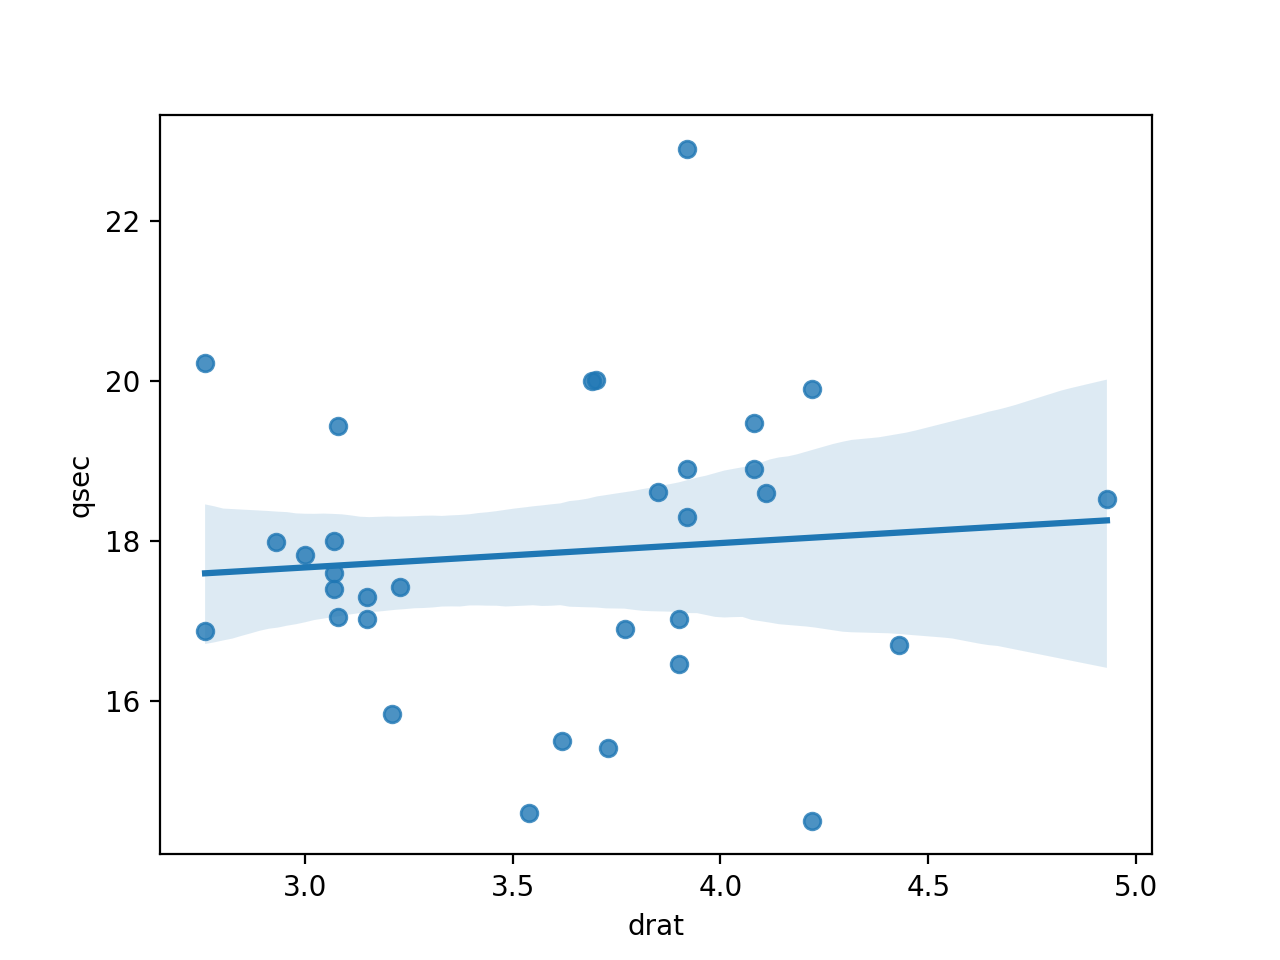

In [ ]:
# Create plot with first new geometry here
import seaborn as sns
# use the function regplot to make a scatterplot
sns.regplot(x=df["drat"], y=df["qsec"])

<ipython-input-21-4ee4b80d0eac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='mpg'>

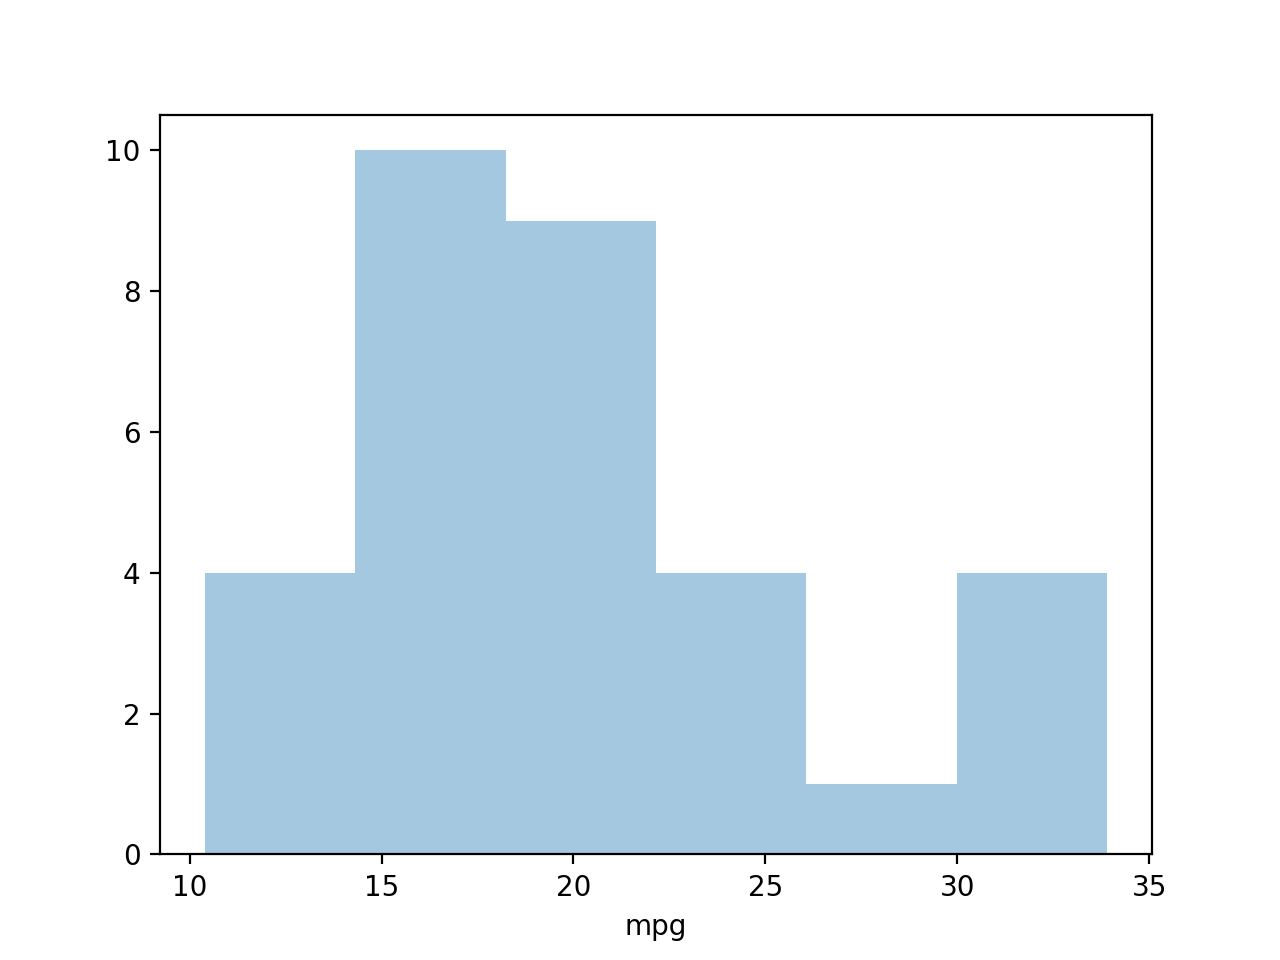

In [ ]:
# Create plot with second new geometry here
sns.distplot( a=df["mpg"], hist=True, kde=False, rug=False )

(array([[4., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 3., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 3., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 1., 0., 0., 0.]]),
 array([ 71.1 , 111.19, 151.28, 191.37, 231.46, 271.55, 311.64, 351.73,
        391.82, 431.91, 472.  ]),
 array([ 52. ,  80.3, 108.6, 136.9, 165.2, 193.5, 221.8, 250.1, 278.4,
        306.7, 335. ]),
 <matplotlib.collections.QuadMesh at 0x78fd1657ea10>)

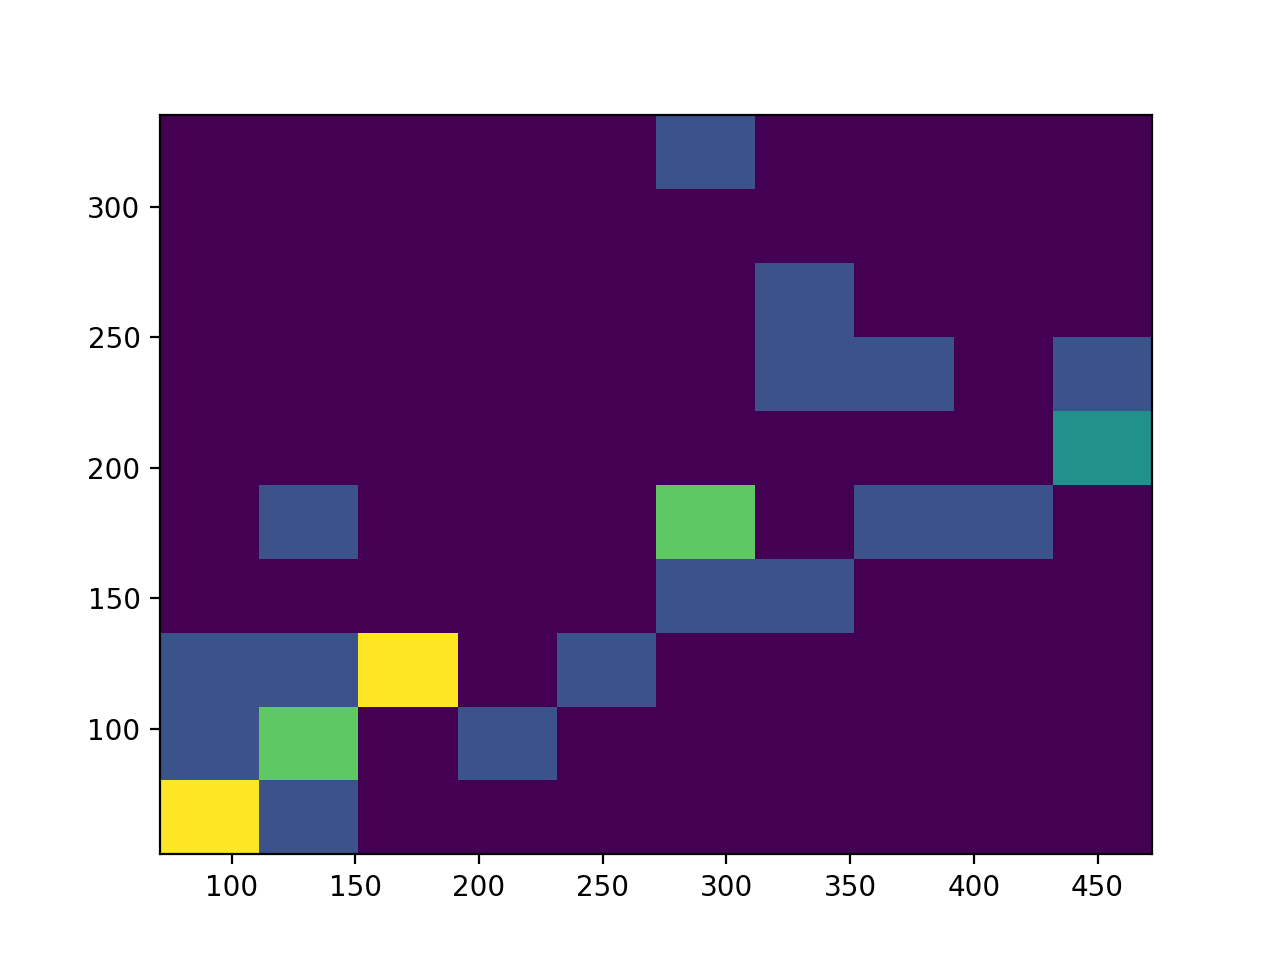

In [ ]:
from matplotlib.pyplot import hist2d
# Create plot with third new geometry here
hist2d(df["disp"],df["hp"])